https://www.allesfitter.com/allesclass/retriving-data-and-models

In [1]:
import os

assert os.environ['CONDA_DEFAULT_ENV']=='ttv'

## eccentric

In [2]:
import os
import pickle
import gzip
from allesfitter import config

datadir = '../allesfitter/joint_ird_m3/eccentric/'
config.init(datadir)
f = gzip.GzipFile(os.path.join(config.BASEMENT.outdir,'save_ns.pickle.gz'), 'rb')
results = pickle.load(f)
f.close()

results.keys(), #len(results)

Filling the Basement


allesfitter version
---------------------
v1.2.10
OrderedDict([('user-given:', ''),
             ('companions_phot', ['b']),
             ('companions_rv', ['b']),
             ('inst_phot', ['g', 'r', 'i', 'z']),
             ('inst_rv', ['ird']),
             ('multiprocess', True),
             ('multiprocess_cores', '40'),
             ('fast_fit', 'True'),
             ('fast_fit_width', '0.3333333333333333'),
             ('secondary_eclipse', 'False'),
             ('phase_curve', 'False'),
             ('shift_epoch', True),
             ('inst_for_b_epoch', ['g', 'r', 'i', 'z', 'ird']),
             ('mcmc_nwalkers', '100'),
             ('mcmc_total_steps', '2000'),
             ('mcmc_burn_steps', '1000'),
             ('mcmc_thin_by', '1'),
             ('ns_modus', 'dynamic'),
             ('ns_nlive', '500'),
             ('ns_bound', 'single'),
             ('ns_sample', 'rwalk'),
             ('ns_tol', '0.01'),
             ('host_ld_law_g', 'qua

(['niter',
  'ncall',
  'eff',
  'samples',
  'samples_id',
  'samples_batch',
  'samples_it',
  'samples_u',
  'samples_n',
  'logwt',
  'logl',
  'logvol',
  'logz',
  'batch_nlive',
  'batch_bounds',
  'blob',
  'logzerr',
  'information',
  'bound',
  'bound_iter',
  'samples_bound',
  'scale'],)

In [3]:
results['samples'].shape

(33050, 23)

In [4]:
from allesfitter import nested_sampling_output, general_output

posterior_samples = nested_sampling_output.draw_ns_posterior_samples(results)
posterior_samples.shape

(33050, 23)

In [5]:
config.BASEMENT.fitkeys, len(config.BASEMENT.fitkeys) 

(array(['b_rr', 'b_rsuma', 'b_cosi', 'b_epoch', 'b_period', 'b_K', 'b_f_c',
        'b_f_s', 'ln_err_flux_g', 'ln_err_flux_r', 'ln_err_flux_i',
        'ln_err_flux_z', 'ln_jitter_rv_ird',
        'baseline_gp_matern32_lnsigma_flux_g',
        'baseline_gp_matern32_lnrho_flux_g',
        'baseline_gp_matern32_lnsigma_flux_r',
        'baseline_gp_matern32_lnrho_flux_r',
        'baseline_gp_matern32_lnsigma_flux_i',
        'baseline_gp_matern32_lnrho_flux_i',
        'baseline_gp_matern32_lnsigma_flux_z',
        'baseline_gp_matern32_lnrho_flux_z',
        'baseline_gp_matern32_lnsigma_rv_ird',
        'baseline_gp_matern32_lnrho_rv_ird'], dtype='<U35'),
 23)

In [6]:
posterior_params = nested_sampling_output.draw_ns_posterior_samples(results, as_type='dic') # all weighted posterior_samples
posterior_params_median, posterior_params_ll, posterior_params_ul = general_output.get_params_from_samples(posterior_samples)

In [7]:
posterior_params.keys()

dict_keys(['b_rr', 'b_rsuma', 'b_cosi', 'b_epoch', 'b_period', 'b_K', 'b_f_c', 'b_f_s', 'ln_err_flux_g', 'ln_err_flux_r', 'ln_err_flux_i', 'ln_err_flux_z', 'ln_jitter_rv_ird', 'baseline_gp_matern32_lnsigma_flux_g', 'baseline_gp_matern32_lnrho_flux_g', 'baseline_gp_matern32_lnsigma_flux_r', 'baseline_gp_matern32_lnrho_flux_r', 'baseline_gp_matern32_lnsigma_flux_i', 'baseline_gp_matern32_lnrho_flux_i', 'baseline_gp_matern32_lnsigma_flux_z', 'baseline_gp_matern32_lnrho_flux_z', 'baseline_gp_matern32_lnsigma_rv_ird', 'baseline_gp_matern32_lnrho_rv_ird'])

In [7]:
import allesfitter 

allesfitter.deriver.derive(posterior_samples, mode='ns')

Deriving eclipse depths (and more) from the model curves for companion b and instrument g...
Deriving eclipse depths (and more) from the model curves for companion b and instrument r...
Deriving eclipse depths (and more) from the model curves for companion b and instrument i...
Deriving eclipse depths (and more) from the model curves for companion b and instrument z...

Saved ns_derived_results.csv, ns_derived_latex_table.txt, and ns_derived_latex_cmd.txt

Saved ns_derived_corner.pdf


In [10]:
import pandas as pd

posterior_samples = pd.DataFrame(posterior_samples, columns=posterior_params.keys())
posterior_samples.head()

,b_rr,b_rsuma,b_cosi,b_epoch,b_period,b_K,b_f_c,b_f_s,ln_err_flux_g,ln_err_flux_r,...,baseline_gp_matern32_lnsigma_flux_g,baseline_gp_matern32_lnrho_flux_g,baseline_gp_matern32_lnsigma_flux_r,baseline_gp_matern32_lnrho_flux_r,baseline_gp_matern32_lnsigma_flux_i,baseline_gp_matern32_lnrho_flux_i,baseline_gp_matern32_lnsigma_flux_z,baseline_gp_matern32_lnrho_flux_z,baseline_gp_matern32_lnsigma_rv_ird,baseline_gp_matern32_lnrho_rv_ird
0,0.273365,0.071785,0.005020,2.459964e+06,3.307821,0.193433,-0.346662,-0.011586,-4.521145,-5.106736,...,-4.685113,9.123326,-4.714174,-1.688126,-5.533576,8.784435,-4.652768,-2.550752,-2.442468,-2.824810
1,0.275703,0.071805,0.011828,2.459964e+06,3.307824,0.242889,-0.271030,-0.073591,-4.478401,-5.049976,...,-4.616755,12.336618,-4.175130,3.223408,-5.664454,10.877558,-5.335324,-2.738718,-2.474904,-0.826723
2,0.273562,0.071739,0.009071,2.459964e+06,3.307819,0.233236,0.140692,-0.058006,-4.545990,-5.039493,...,-3.975010,5.915256,-4.705983,-2.306526,-5.194856,10.334400,-5.687911,-0.201790,-1.834089,-1.861865
3,0.274263,0.071765,0.010777,2.459964e+06,3.307824,0.324518,-0.293252,-0.051862,-4.669053,-5.028337,...,-3.983657,-2.736529,-5.034768,-3.013342,-5.764287,3.952206,-4.547801,-3.042001,-2.524047,-2.157312
4,0.272088,0.071892,0.009687,2.459964e+06,3.307819,0.352174,-0.116895,-0.006246,-4.569621,-5.029154,...,-5.315383,2.592549,-4.706682,-3.605269,-2.709165,11.461688,-5.095442,-2.742356,-1.852814,-1.464652


In [ ]:
posterior_samples.to_csv('../allesfitter/joint_ird_m3/eccentric_model_samples.csv.gz')

In [17]:
import numpy as np

params = {}
for param in allesfitter.deriver.derived_samples:
    if isinstance(allesfitter.deriver.derived_samples[param], np.ndarray):
        params[param] = allesfitter.deriver.derived_samples[param]

In [19]:
derived_posterior_samples = pd.DataFrame(params)
derived_posterior_samples

,b_R_star/a,b_a/R_star,b_R_companion/a,b_R_companion_(R_earth),b_R_companion_(R_jup),b_a_(R_sun),b_a_(AU),b_i,b_e,b_e_sinw,...,b_nightside_flux_undil_r,b_depth_tr_undil_i,b_depth_occ_undil_i,b_nightside_flux_undil_i,b_depth_tr_undil_z,b_depth_occ_undil_z,b_nightside_flux_undil_z,b_Teq,b_density,b_surface_gravity
0,0.056374,17.738547,0.015411,11.878827,1.059760,7.066725,0.032864,89.712373,0.120309,-0.004019,...,NaN,86.829126,NaN,NaN,85.786722,NaN,NaN,492.340024,0.794963,1777.644749
1,0.056286,17.766253,0.015518,12.133620,1.082491,7.168272,0.033336,89.322311,0.078873,-0.020667,...,NaN,86.315015,NaN,NaN,86.302223,NaN,NaN,491.232737,0.927423,2210.630305
2,0.056329,17.752794,0.015410,12.331907,1.100181,7.336868,0.034120,89.480288,0.023159,-0.008827,...,NaN,87.152415,NaN,NaN,85.679502,NaN,NaN,489.394940,0.776886,2158.958440
3,0.056319,17.755986,0.015446,12.194529,1.087925,7.237891,0.033660,89.382528,0.088687,-0.015445,...,NaN,86.005457,NaN,NaN,86.210960,NaN,NaN,502.346148,1.246810,2978.712638
4,0.056515,17.694460,0.015377,12.078556,1.077578,7.201310,0.033489,89.444993,0.013703,-0.000731,...,NaN,86.193286,NaN,NaN,86.180125,NaN,NaN,541.201928,1.318794,3274.282125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33045,0.056299,17.762245,0.015457,12.217407,1.089966,7.246495,0.033700,89.428307,0.072537,-0.009566,...,NaN,87.341391,NaN,NaN,85.913874,NaN,NaN,520.192714,0.527330,1303.389094
33046,0.056199,17.793937,0.015480,12.266809,1.094373,7.264998,0.033786,89.377572,0.020856,-0.019293,...,NaN,87.341039,NaN,NaN,86.291121,NaN,NaN,521.545161,0.686515,1842.943924
33047,0.056335,17.751061,0.015361,12.381471,1.104603,7.389485,0.034365,89.788503,0.007438,0.007293,...,NaN,87.303965,NaN,NaN,86.196465,NaN,NaN,523.887257,0.567110,1505.316860
33048,0.056318,17.756458,0.015438,12.564501,1.120932,7.461607,0.034700,89.486884,0.003382,0.000149,...,NaN,86.483176,NaN,NaN,86.194536,NaN,NaN,485.485526,0.683467,1897.604320


In [21]:
derived_posterior_samples.to_csv('../allesfitter/joint_ird_m3/eccentric_model_derived_samples.csv.gz')

In [20]:
def get_luminosity(rstar, teff_star):
    return rstar**2*teff_star**4
    
def get_insolation(rstar, teff_star, sma_AU):
    lum = get_luminosity(rstar, teff_star)
    return lum*(1/sma_AU)**2

Rstar = (0.408427, 0.0125522)
Mstar = (0.400962, 0.0205648)
Teffstar = (3380, 157)

sma_AU_samples = allesfitter.deriver.derived_samples['b_a_(AU)']
N = len(sma_AU_samples)
Rs_samples = np.random.normal(*Rstar, size=N)
# Ms_samples = np.random.normal(*Mstar, size=N)
Teffstar_samples = np.random.normal(*Teffstar, size=N)
insol_s = get_insolation(Rs_samples, Teffstar_samples/5770, sma_AU_samples)
np.median(insol_s), np.std(insol_s)

(17.090362147488914, 3.519797053443355)

In [22]:
allesfitter.deriver.derived_samples.keys()

dict_keys(['b_R_star/a', 'b_a/R_star', 'b_R_companion/a', 'b_R_companion_(R_earth)', 'b_R_companion_(R_jup)', 'b_a_(R_sun)', 'b_a_(AU)', 'b_i', 'b_e', 'b_e_sinw', 'b_e_cosw', 'b_w', 'b_q', 'b_M_companion_(M_earth)', 'b_M_companion_(M_jup)', 'b_M_companion_(M_sun)', 'b_b_tra', 'b_T_tra_tot', 'b_T_tra_full', 'b_depth_tr_dil_g', 'b_depth_occ_dil_g', 'b_nightside_flux_dil_g', 'b_depth_tr_dil_r', 'b_depth_occ_dil_r', 'b_nightside_flux_dil_r', 'b_depth_tr_dil_i', 'b_depth_occ_dil_i', 'b_nightside_flux_dil_i', 'b_depth_tr_dil_z', 'b_depth_occ_dil_z', 'b_nightside_flux_dil_z', 'b_depth_tr_undil_g', 'b_depth_occ_undil_g', 'b_nightside_flux_undil_g', 'b_depth_tr_undil_r', 'b_depth_occ_undil_r', 'b_nightside_flux_undil_r', 'b_depth_tr_undil_i', 'b_depth_occ_undil_i', 'b_nightside_flux_undil_i', 'b_depth_tr_undil_z', 'b_depth_occ_undil_z', 'b_nightside_flux_undil_z', 'b_Teq', 'b_density', 'b_surface_gravity', 'host_ldc_u1_g', 'host_ldc_u2_g', 'host_ldc_u1_r', 'host_ldc_u2_r', 'host_ldc_u1_i', 'hos

In [23]:
imp=posterior_params['b_cosi']*allesfitter.deriver.derived_samples['b_a_(R_sun)']

In [24]:
import pandas as pd

# 
params = ['b_R_companion_(R_jup)','b_M_companion_(M_jup)'] #'b_e' 'b_a/R_star'
derived_params = {}
for p in params:
    derived_params[p] = allesfitter.deriver.derived_samples[p]
    print(len(allesfitter.deriver.derived_samples[p]))

33050
33050


In [25]:
derived_params['imp_par'] = posterior_params['b_cosi']*allesfitter.deriver.derived_samples['b_a_(R_sun)']

In [26]:
esinw = allesfitter.deriver.derived_samples['b_e_sinw']
ecosw = allesfitter.deriver.derived_samples['b_e_cosw']
e = np.sqrt(esinw**2+ecosw**2)
e

array([0.12030904, 0.07887304, 0.02315894, ..., 0.00743792, 0.00338197,
       0.01643988])

## circular

In [69]:
import allesfitter
import numpy as np

af2 = allesfitter.allesclass(datadir)

Filling the Basement

OrderedDict([('user-given:', ''),
             ('companions_phot', ['b']),
             ('companions_rv', ['b']),
             ('inst_phot', ['g', 'r', 'i', 'z']),
             ('inst_rv', ['ird']),
             ('multiprocess', True),
             ('multiprocess_cores', '40'),
             ('fast_fit', 'True'),
             ('fast_fit_width', '0.3333333333333333'),
             ('secondary_eclipse', 'False'),
             ('phase_curve', 'False'),
             ('shift_epoch', True),
             ('inst_for_b_epoch', ['g', 'r', 'i', 'z', 'ird']),
             ('mcmc_nwalkers', '100'),
             ('mcmc_total_steps', '2000'),
             ('mcmc_burn_steps', '1000'),
             ('mcmc_thin_by', '1'),
             ('ns_modus', 'dynamic'),
             ('ns_nlive', '500'),
             ('ns_bound', 'single'),
             ('ns_sample', 'rwalk'),
             ('ns_tol', '0.01'),
             ('host_ld_law_g', 'quad'),
             ('host_ld_law_r', 'quad'),
      

In [70]:
import os
import pickle
import gzip
from allesfitter import config as config2

datadir = '../allesfitter/joint_ird_m3/circular/'
config2.init(datadir)
f = gzip.GzipFile(os.path.join(config2.BASEMENT.outdir,'save_ns.pickle.gz'), 'rb')
results2 = pickle.load(f)
f.close()

results2.keys(), #len(results)

Filling the Basement


allesfitter version
---------------------
v1.2.10
OrderedDict([('user-given:', ''),
             ('companions_phot', ['b']),
             ('companions_rv', ['b']),
             ('inst_phot', ['g', 'r', 'i', 'z']),
             ('inst_rv', ['ird']),
             ('multiprocess', True),
             ('multiprocess_cores', '40'),
             ('fast_fit', 'True'),
             ('fast_fit_width', '0.3333333333333333'),
             ('secondary_eclipse', 'False'),
             ('phase_curve', 'False'),
             ('shift_epoch', True),
             ('inst_for_b_epoch', ['g', 'r', 'i', 'z', 'ird']),
             ('mcmc_nwalkers', '100'),
             ('mcmc_total_steps', '2000'),
             ('mcmc_burn_steps', '1000'),
             ('mcmc_thin_by', '1'),
             ('ns_modus', 'dynamic'),
             ('ns_nlive', '500'),
             ('ns_bound', 'single'),
             ('ns_sample', 'rwalk'),
             ('ns_tol', '0.01'),
             ('host_ld_law_g', 'qua

(['niter',
  'ncall',
  'eff',
  'samples',
  'samples_id',
  'samples_batch',
  'samples_it',
  'samples_u',
  'samples_n',
  'logwt',
  'logl',
  'logvol',
  'logz',
  'batch_nlive',
  'batch_bounds',
  'blob',
  'logzerr',
  'information',
  'bound',
  'bound_iter',
  'samples_bound',
  'scale'],)

In [71]:
results['samples'].shape

(36000, 21)

In [72]:
from allesfitter import nested_sampling_output, general_output

posterior_samples2 = nested_sampling_output.draw_ns_posterior_samples(results2)
posterior_samples2.shape

(36000, 21)

In [73]:
config2.BASEMENT.fitkeys, len(config2.BASEMENT.fitkeys) 

(array(['b_rr', 'b_rsuma', 'b_cosi', 'b_epoch', 'b_period', 'b_K',
        'ln_err_flux_g', 'ln_err_flux_r', 'ln_err_flux_i', 'ln_err_flux_z',
        'ln_jitter_rv_ird', 'baseline_gp_matern32_lnsigma_flux_g',
        'baseline_gp_matern32_lnrho_flux_g',
        'baseline_gp_matern32_lnsigma_flux_r',
        'baseline_gp_matern32_lnrho_flux_r',
        'baseline_gp_matern32_lnsigma_flux_i',
        'baseline_gp_matern32_lnrho_flux_i',
        'baseline_gp_matern32_lnsigma_flux_z',
        'baseline_gp_matern32_lnrho_flux_z',
        'baseline_gp_matern32_lnsigma_rv_ird',
        'baseline_gp_matern32_lnrho_rv_ird'], dtype='<U35'),
 21)

In [74]:
posterior_params2 = nested_sampling_output.draw_ns_posterior_samples(results2, as_type='dic') # all weighted posterior_samples
posterior_params_median, posterior_params_ll, posterior_params_ul = general_output.get_params_from_samples(posterior_samples2)

In [75]:
posterior_params2.keys()

dict_keys(['b_rr', 'b_rsuma', 'b_cosi', 'b_epoch', 'b_period', 'b_K', 'ln_err_flux_g', 'ln_err_flux_r', 'ln_err_flux_i', 'ln_err_flux_z', 'ln_jitter_rv_ird', 'baseline_gp_matern32_lnsigma_flux_g', 'baseline_gp_matern32_lnrho_flux_g', 'baseline_gp_matern32_lnsigma_flux_r', 'baseline_gp_matern32_lnrho_flux_r', 'baseline_gp_matern32_lnsigma_flux_i', 'baseline_gp_matern32_lnrho_flux_i', 'baseline_gp_matern32_lnsigma_flux_z', 'baseline_gp_matern32_lnrho_flux_z', 'baseline_gp_matern32_lnsigma_rv_ird', 'baseline_gp_matern32_lnrho_rv_ird'])

In [76]:
import allesfitter 

allesfitter.deriver.derive(posterior_samples2, mode='ns')

Deriving eclipse depths (and more) from the model curves for companion b and instrument g...
Deriving eclipse depths (and more) from the model curves for companion b and instrument r...
Deriving eclipse depths (and more) from the model curves for companion b and instrument i...
Deriving eclipse depths (and more) from the model curves for companion b and instrument z...

Saved ns_derived_results.csv, ns_derived_latex_table.txt, and ns_derived_latex_cmd.txt

Saved ns_derived_corner.pdf


In [77]:
import pandas as pd

posterior_samples2 = pd.DataFrame(posterior_samples2, columns=posterior_params2.keys())
posterior_samples2.head()

,b_rr,b_rsuma,b_cosi,b_epoch,b_period,b_K,ln_err_flux_g,ln_err_flux_r,ln_err_flux_i,ln_err_flux_z,...,baseline_gp_matern32_lnsigma_flux_g,baseline_gp_matern32_lnrho_flux_g,baseline_gp_matern32_lnsigma_flux_r,baseline_gp_matern32_lnrho_flux_r,baseline_gp_matern32_lnsigma_flux_i,baseline_gp_matern32_lnrho_flux_i,baseline_gp_matern32_lnsigma_flux_z,baseline_gp_matern32_lnrho_flux_z,baseline_gp_matern32_lnsigma_rv_ird,baseline_gp_matern32_lnrho_rv_ird
0,0.273109,0.072914,0.012660,2.459964e+06,3.307839,0.208088,-4.577615,-4.948222,-5.078063,-5.414381,...,-3.845224,-0.289507,-5.086324,-3.447351,-4.445443,12.696092,-5.316508,-2.801467,-2.091699,-1.463433
1,0.275169,0.072778,0.013419,2.459964e+06,3.307815,0.153558,-4.517016,-5.025957,-5.132412,-5.468436,...,-4.124221,4.520665,-4.623162,-2.135785,-1.408370,12.625680,-4.662682,-3.479338,-2.380340,-2.266641
2,0.272432,0.072124,0.010491,2.459964e+06,3.307820,0.147435,-4.622758,-5.073069,-5.076806,-5.337619,...,-3.916076,0.356063,-4.198154,0.467832,-4.467527,7.060949,-3.917340,-0.944988,-1.726979,-2.458050
3,0.274475,0.072731,0.014269,2.459964e+06,3.307829,0.216791,-4.625133,-5.014133,-5.111350,-5.369854,...,-3.852282,13.322801,-4.354511,-1.906215,-4.263210,3.466018,-5.114828,-4.298802,-2.169887,-2.823276
4,0.272949,0.072194,0.009091,2.459964e+06,3.307826,0.243212,-4.524773,-4.993401,-5.108779,-5.391923,...,-4.570835,4.273220,-4.309535,-1.441369,-5.218114,5.907565,-4.891243,-2.130625,-2.072210,-2.390795


In [78]:
posterior_samples2.to_csv('../allesfitter/joint_ird_m3/circular_model_samples.csv.gz')

In [79]:
params2 = {}
for param in allesfitter.deriver.derived_samples:
    if isinstance(allesfitter.deriver.derived_samples[param], np.ndarray):
        params2[param] = allesfitter.deriver.derived_samples[param]

In [80]:
import pandas as pd

derived_posterior_samples2 = pd.DataFrame(params2)
derived_posterior_samples2

,b_R_star/a,b_a/R_star,b_R_companion/a,b_R_companion_(R_earth),b_R_companion_(R_jup),b_a_(R_sun),b_a_(AU),b_i,b_q,b_M_companion_(M_earth),...,b_nightside_flux_undil_r,b_depth_tr_undil_i,b_depth_occ_undil_i,b_nightside_flux_undil_i,b_depth_tr_undil_z,b_depth_occ_undil_z,b_nightside_flux_undil_z,b_Teq,b_density,b_surface_gravity
0,0.057273,17.460347,0.015642,12.382558,1.104700,7.257672,0.033752,89.274642,0.001879,278.966876,...,NaN,86.971643,NaN,NaN,86.129311,NaN,NaN,513.151755,0.807404,1869.988578
1,0.057073,17.521334,0.015705,12.354126,1.102163,7.211883,0.033539,89.231135,0.001395,183.432827,...,NaN,85.840252,NaN,NaN,85.742983,NaN,NaN,565.283491,0.534577,1368.897786
2,0.056682,17.642396,0.015442,12.303787,1.097672,7.304789,0.033971,89.398917,0.001322,194.289109,...,NaN,86.679374,NaN,NaN,83.715790,NaN,NaN,483.631898,0.573194,1359.405749
3,0.057068,17.523072,0.015664,12.380233,1.104492,7.246125,0.033698,89.182395,0.001961,250.852314,...,NaN,86.391319,NaN,NaN,85.938042,NaN,NaN,517.781450,0.726442,1942.779445
4,0.056714,17.632423,0.015480,12.358173,1.102524,7.319046,0.034037,89.479122,0.002178,285.089619,...,NaN,85.932113,NaN,NaN,85.634072,NaN,NaN,518.136137,0.830019,2231.458379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,0.058235,17.171661,0.016067,12.558324,1.120381,7.165995,0.033325,89.042367,0.001385,170.937391,...,NaN,87.140387,NaN,NaN,85.076647,NaN,NaN,490.963870,0.474254,1290.287392
35996,0.056059,17.838360,0.015324,12.810810,1.142906,7.664357,0.035643,89.759512,0.001956,255.120677,...,NaN,86.940308,NaN,NaN,86.791007,NaN,NaN,575.956625,0.666784,2142.050179
35997,0.056998,17.544419,0.015554,12.371672,1.103729,7.292293,0.033913,89.425757,0.001366,172.726379,...,NaN,85.912953,NaN,NaN,85.712351,NaN,NaN,514.254298,0.501237,1382.005028
35998,0.056411,17.727110,0.015468,12.662582,1.129682,7.504961,0.034902,89.413158,0.002246,269.950780,...,NaN,86.438522,NaN,NaN,86.524339,NaN,NaN,527.057206,0.730613,2362.994253


In [81]:
derived_posterior_samples2.to_csv('../allesfitter/joint_ird_m3/circular_model_derived_samples.csv.gz')

## Compare

In [49]:
import pandas as pd

df1 = pd.read_csv('../allesfitter/joint_ird_m3/circular_model_derived_samples.csv.gz')
df2 = pd.read_csv('../allesfitter/joint_ird_m3/eccentric_model_derived_samples.csv.gz')

In [50]:
len(df1.columns), len(df2.columns)

(43, 47)

In [51]:
len(df1), len(df2)

(36000, 33050)

In [57]:
import pandas as pd

d1 = pd.read_csv('../allesfitter/joint_ird_m3/circular_model_samples.csv.gz')
d2 = pd.read_csv('../allesfitter/joint_ird_m3/eccentric_model_samples.csv.gz')

In [58]:
len(d1.columns), len(d2.columns)

(22, 24)

In [59]:
len(d1), len(d2)

(36000, 33050)

In [52]:
import astropy.units as u

def get_rho_from_jup_to_gcc(Mp, Rp):
    m = Mp*u.Mjup.to(u.g)
    r = Rp*u.Rjup.to(u.cm)
    vol = 4/3*np.pi*r**3
    rho = m/vol
    return rho

In [53]:
Rp_samples = df1['b_R_companion_(R_jup)']
Mp_samples = df1['b_M_companion_(M_jup)']
df1['rho_p'] = get_rho_from_jup_to_gcc(Mp_samples, Rp_samples)

In [54]:
Rp_samples = df2['b_R_companion_(R_jup)']
Mp_samples = df2['b_M_companion_(M_jup)']
df2['rho_p'] = get_rho_from_jup_to_gcc(Mp_samples, Rp_samples)

In [64]:
df1['imp_par'] = d1['b_cosi']*df1['b_a_(R_sun)']

In [65]:
df2['imp_par'] = d2['b_cosi']*df2['b_a_(R_sun)']

In [67]:
cols = ['b_R_companion_(R_jup)','b_M_companion_(M_jup)','imp_par']
df1[cols].head()

,b_R_companion_(R_jup),b_M_companion_(M_jup),imp_par
0,1.109916,0.767200,0.096082
1,1.106796,0.552169,0.082385
2,1.111461,1.223918,0.132873
3,1.109133,0.882421,0.094626
4,1.108396,0.612834,0.093775


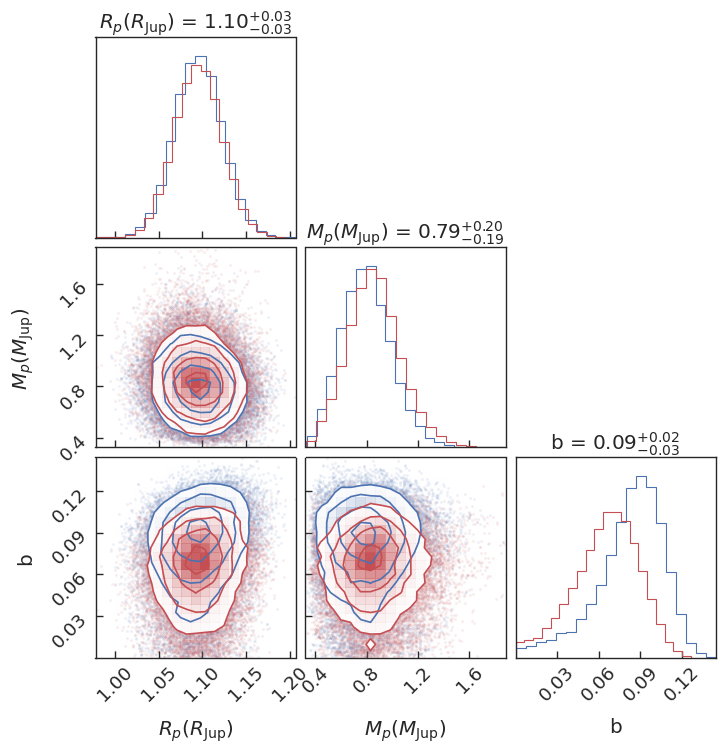

In [68]:
from corner import corner

# labels = [r'$R_p (R_{\rm{Jup}}$)',r'$M_p (M_{\rm{Jup}}$)',r'$\rho_p$ (cgs)']
labels = [r'$R_p (R_{\rm{Jup}}$)',r'$M_p (M_{\rm{Jup}}$)','b']
fig = corner(df1[cols], show_titles=True, labels=labels, color='C0')
_ = corner(df2[cols], fig=fig, weights=np.ones(len(df2[cols]))*len(df1[cols])/len(df2[cols]), color='C3')

In [11]:
instruments = list(config.BASEMENT.fulldata.keys())
instruments

['g', 'r', 'i', 'z']

In [12]:
inst_names = ['MuSCAT3 $g\'$', 'MuSCAT3 $r\'$', 'MuSCAT3 $i\'$', 'MuSCAT3 $z_s$']

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'ird, companion b only'}, xlabel='Phase', ylabel='RV (km/s) - Baseline'>)

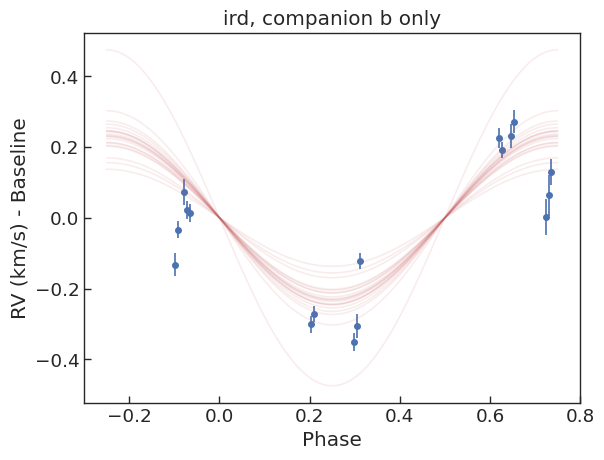

In [86]:
#'full' / 'phase' / 'phasezoom'
i = 'ird'
af.plot(i, 'b', style='phase')

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'ird, companion b only'}, xlabel='Phase', ylabel='RV (km/s) - Baseline'>)

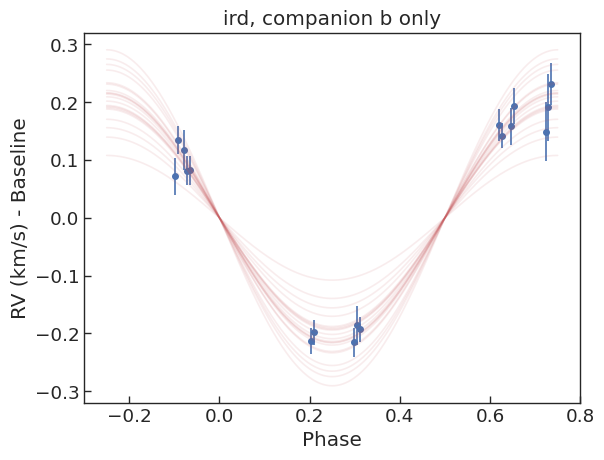

In [85]:
#'full' / 'phase' / 'phasezoom'
i = 'ird'
af2.plot(i, 'b', style='phase')

## all: space+ground

In [17]:
import os
import pickle
import gzip
from allesfitter import config

datadir = '../allesfitter/all_lc/'
config.init(datadir)
f = gzip.GzipFile(os.path.join(config.BASEMENT.outdir,'save_ns.pickle.gz'), 'rb')
results = pickle.load(f)
f.close()

results.keys(), #len(results)

Filling the Basement


allesfitter version
---------------------
v1.2.10
OrderedDict([('user-given:', ''),
             ('companions_phot', ['b']),
             ('companions_rv', []),
             ('inst_phot',
              ['muscat3_gp',
               'muscat3_rp',
               'lco1m_gp',
               'lco1m_V',
               'muscat3_ip',
               'keplercam_ip',
               'muscat3_zs',
               'lco0.4m_zs_2',
               'tess']),
             ('inst_rv', []),
             ('multiprocess', True),
             ('multiprocess_cores', '40'),
             ('fast_fit', 'False'),
             ('fast_fit_width', '0.5'),
             ('secondary_eclipse', 'True'),
             ('phase_curve', 'False'),
             ('shift_epoch', True),
             ('inst_for_b_epoch',
              ['muscat3_gp',
               'muscat3_rp',
               'lco1m_gp',
               'lco1m_V',
               'muscat3_ip',
               'keplercam_ip',
               'muscat3

(['niter',
  'ncall',
  'eff',
  'samples',
  'samples_id',
  'samples_batch',
  'samples_it',
  'samples_u',
  'samples_n',
  'logwt',
  'logl',
  'logvol',
  'logz',
  'batch_nlive',
  'batch_bounds',
  'blob',
  'logzerr',
  'information',
  'bound',
  'bound_iter',
  'samples_bound',
  'scale'],)

In [18]:
results['samples'].shape

(53369, 37)

In [19]:
from allesfitter import nested_sampling_output, general_output

posterior_samples = nested_sampling_output.draw_ns_posterior_samples(results)
posterior_samples.shape

(53369, 37)

In [20]:
config.BASEMENT.fitkeys, len(config.BASEMENT.fitkeys) 

(array(['b_rr', 'b_rsuma', 'b_cosi', 'b_epoch', 'b_period',
        'ln_err_flux_muscat3_gp', 'ln_err_flux_speculoos_gp',
        'ln_err_flux_lco1m_gp', 'ln_err_flux_lco1m_V',
        'ln_err_flux_muscat3_rp', 'ln_err_flux_muscat3_rp',
        'ln_err_flux_muscat3_ip', 'ln_err_flux_keplercam_ip',
        'ln_err_flux_muscat3_zs', 'ln_err_flux_trappist_Iz_1',
        'ln_err_flux_trappist_Iz_2', 'ln_err_flux_speculoos_zs',
        'ln_err_flux_lco0.4m_zs_2', 'ln_err_flux_tess',
        'baseline_gp_matern32_lnsigma_flux_muscat3_gp',
        'baseline_gp_matern32_lnrho_flux_muscat3_gp',
        'baseline_gp_matern32_lnsigma_flux_lco1m_gp',
        'baseline_gp_matern32_lnrho_flux_lco1m_gp',
        'baseline_gp_matern32_lnsigma_flux_lco1m_V',
        'baseline_gp_matern32_lnrho_flux_lco1m_V',
        'baseline_gp_matern32_lnsigma_flux_muscat3_rp',
        'baseline_gp_matern32_lnrho_flux_muscat3_rp',
        'baseline_gp_matern32_lnsigma_flux_muscat3_ip',
        'baseline_gp_matern32_l

In [21]:
posterior_params = nested_sampling_output.draw_ns_posterior_samples(results, as_type='dic') # all weighted posterior_samples
posterior_params_median, posterior_params_ll, posterior_params_ul = general_output.get_params_from_samples(posterior_samples)

In [22]:
import allesfitter
import numpy as np

af = allesfitter.allesclass(datadir)

Filling the Basement

OrderedDict([('user-given:', ''),
             ('companions_phot', ['b']),
             ('companions_rv', []),
             ('inst_phot',
              ['muscat3_gp',
               'muscat3_rp',
               'lco1m_gp',
               'lco1m_V',
               'muscat3_ip',
               'keplercam_ip',
               'muscat3_zs',
               'lco0.4m_zs_2',
               'tess']),
             ('inst_rv', []),
             ('multiprocess', True),
             ('multiprocess_cores', '40'),
             ('fast_fit', 'False'),
             ('fast_fit_width', '0.5'),
             ('secondary_eclipse', 'True'),
             ('phase_curve', 'False'),
             ('shift_epoch', True),
             ('inst_for_b_epoch',
              ['muscat3_gp',
               'muscat3_rp',
               'lco1m_gp',
               'lco1m_V',
               'muscat3_ip',
               'keplercam_ip',
               'muscat3_zs',
               'lco0.4m_zs_2',
              

In [23]:
instruments = list(config.BASEMENT.fulldata.keys())
instruments

['muscat3_gp',
 'muscat3_rp',
 'lco1m_gp',
 'lco1m_V',
 'muscat3_ip',
 'keplercam_ip',
 'muscat3_zs',
 'lco0.4m_zs_2',
 'tess']

In [24]:
# inst_names = ['$TESS$', '$Spitzer$', 'LCO u\'', 'LCO i\'', 'LCO g\'', 'NGTS', 'KELT']
inst_names = ['MuSCAT3 $g\'$', 'MuSCAT3 $r\'$', 'MuSCAT3 $i\'$', 'MuSCAT3 $z_s$', 'LCO-1m V', 'Keplercam $i\'$', 'LCO-1m g\'', 'LCO $z_s$', '$TESS$']

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'muscat3_gp, companion b'}, xlabel='$\\mathrm{ T - T_0 \\ (h) }$', ylabel='Relative Flux - Baseline'>)

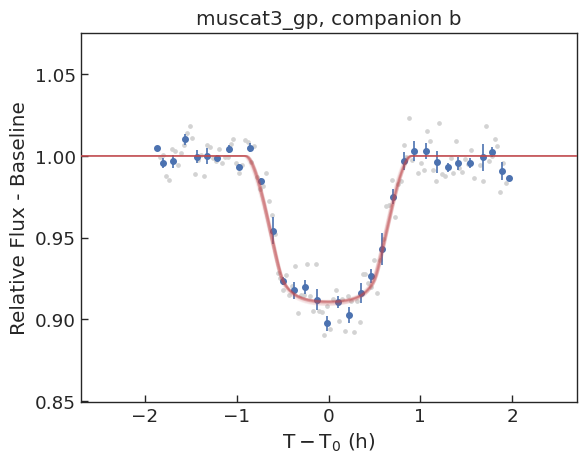

In [25]:
#'full' / 'phase' / 'phasezoom'
i = 'muscat3_gp'
af.plot(i, 'b', style='phasezoom')

In [26]:
from corner import corner

Text(0.5, 0.05, 'Mid-transit (Hours)')

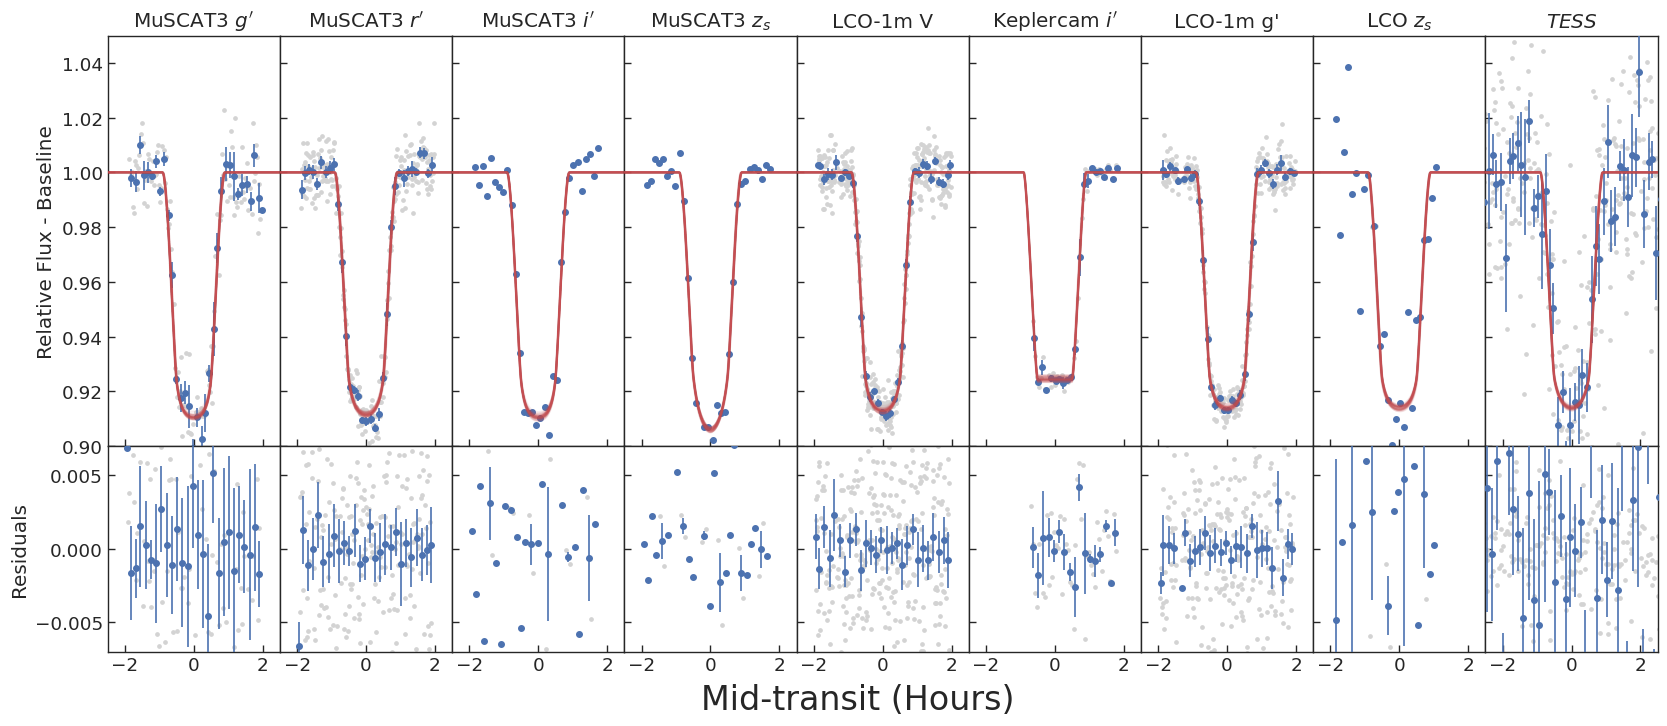

In [23]:
import matplotlib.pyplot as plt

ninst = len(instruments)
fig, axes = plt.subplots(2, ninst, 
                         figsize=(20,8), 
                         gridspec_kw={'height_ratios': [2,1]}, 
                         sharey='row', 
                         sharex='col'
                        )
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
ax = axes.flatten()

ylims1 = [0.9,1.05]
ylims2 = [-0.007,0.007]
xlims = [-2.5,2.5]

style = 'phasezoom'
Nsamples=50
for n,inst in enumerate(instruments):
    af.plot(inst, 'b', style, Nsamples=Nsamples, force_binning=True, ax=ax[n])
    af.plot(inst, 'b', f'{style}_residuals', mode='initial_guess', force_binning=True, ax=ax[n+ninst])
    
    ax[n].set_title(inst_names[n])
    ax[n+ninst].set_title('')
    ax[n+ninst].set_xlabel('')
    
    #remove ylabel except first column
    if n!=0:
        ax[n].set_ylabel('')
        ax[n+ninst].set_ylabel('')
        
    ax[n].set_ylim(*ylims1)
    ax[n+ninst].set_ylim(*ylims2)
    
ax[0].set_ylabel('Relative Flux - Baseline')
for axi in ax:
    axi.set_xlim(*xlims)
    
fig.text(0.5, 0.05, 'Mid-transit (Hours)', va='center', ha='center', fontsize=24)

In [26]:
from aesthetic.plot import savefig

savefig(fig, '../figures/all_lc.pdf', writepdf=False)

2024-02-24T15:27:12.614389: made ../figures/all_lc.pdf


## derived params

In [3]:
import flammkuchen as dd

df = dd.load('../data/phot/allesfit_transit_results.h5')

### vsini

In [44]:
import numpy as np

minerva = pd.read_csv('../data/spec/minerva_rv.txt', delim_whitespace=True, comment='#')
vsini_minerva = minerva.prelimVsini
np.median(vsini_minerva), np.std(vsini_minerva)

(8.266330968467578, 0.029182432807475175)

In [45]:
np.median(samples['radius']), np.percentile(samples['radius'], [16,84])

(0.7765445281930545, array([0.76750278, 0.78693514]))

In [35]:
import astropy.units as u

Rs = samples['radius']*u.Rsun.to(u.km)
Prot = 4.4*u.day.to(u.second)
inc = np.deg2rad(np.random.choice(df['joint']['posterior_samples']['inc'], len(Rs)))
vsini2 = 2*np.pi*Rs/Prot*np.sin(inc)
np.nanmedian(vsini2), np.nanstd(vsini2)

(8.919112045212618, 0.11256350344665209)

In [47]:
vsini_chiron = np.random.normal(3.41,0.85,size=len(Rs))
P=(2*np.pi*Rs*np.sin(inc))/vsini_minerva#vsini_chiron
np.nanmedian(P*u.second.to(u.day))

4.823044649399611

### Teq

In [51]:
Rs = samples['radius']
Teff = samples['Teff']
aRs = np.random.choice(df_samples['aRs'], len(Rs))
Teq_samples = (Teff * np.sqrt(Rs / (2 * aRs)))
Teq_samples.median(), Teq_samples.std()

(894.7508435020263, 35.561223309650245)

In [16]:
np.median(af.posterior_params['host_ldc_q1_tess']), np.std(af.posterior_params['host_ldc_q2_tess'] )

(0.3059200799974964, 0.3864129038122437)

In [17]:
np.median(af.posterior_params['host_ldc_q1_spitzer']), np.std(af.posterior_params['host_ldc_q2_spitzer'] )

(-1.0281288889461961, 0.8584369661127428)

## custom plots

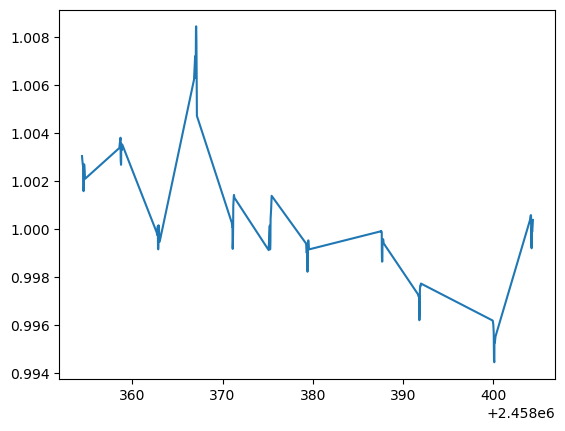

In [41]:
inst = 'tess'
t = af.data[inst]['time']
f = af.data[inst]['flux']
# pl.plot(t,f)
b = af.get_posterior_median_baseline(inst, 'flux')
m = af.get_posterior_median_model(inst, 'flux')
pl.plot(t,m+b)

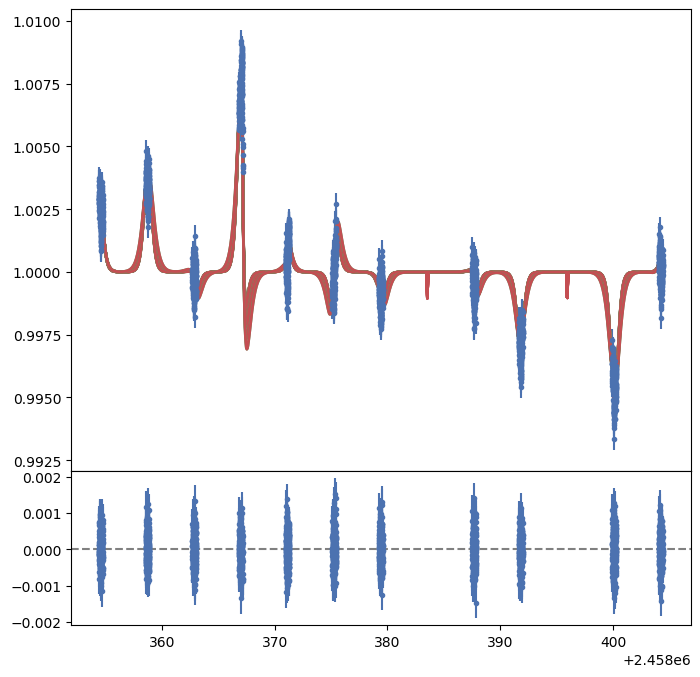

In [42]:
#::: settings
inst = 'tess'
key = 'flux'

#::: load the time, flux, and flux_err
time = af.data[inst]['time']
flux = af.data[inst][key]
flux_err = af.data[inst]['err_scales_'+key] * af.posterior_params_median['err_'+key+'_'+inst]

#::: set up the figure
fig, axes = plt.subplots(2, 1, figsize=(8,8), gridspec_kw={'height_ratios': [3,1]}, sharex=True)
fig.subplots_adjust(hspace=0)

#::: top panel: plot the data and 20 curves from random posterior samples (evaluated on a fine time grid)
ax = axes[0]
ax.errorbar(time, flux, flux_err, fmt='b.')
for i in range(20):
    time_fine = np.linspace(time[0], time[-1], 1000)
    model_fine, baseline_fine, _ = af.get_one_posterior_curve_set(inst, key, xx=time_fine)
    ax.plot(time_fine, 1.+baseline_fine, 'g-', lw=2)
    ax.plot(time_fine, model_fine+baseline_fine, 'r-', lw=2)

#::: bottom panel: plot the residuals;
#::: for that, subtract the "posterior median model" and "posterior median baseline" from the data (evaluated on the time stamps of the data)
ax = axes[1]
baseline = af.get_posterior_median_baseline(inst, key)
model = af.get_posterior_median_model(inst, key)
ax.errorbar(time, flux-(model+baseline), flux_err, fmt='b.')
ax.axhline(0, color='grey', linestyle='--')

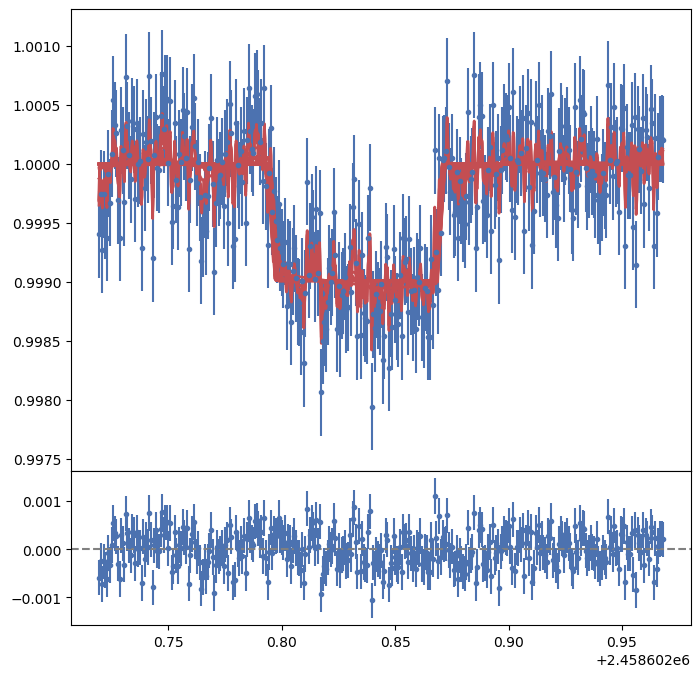

In [44]:
#::: settings
inst = 'spitzer'
key = 'flux'

#::: load the time, flux, and flux_err
time = af.data[inst]['time']
flux = af.data[inst][key]
flux_err = af.data[inst]['err_scales_'+key] * af.posterior_params_median['err_'+key+'_'+inst]

#::: set up the figure
fig, axes = plt.subplots(2, 1, figsize=(8,8), gridspec_kw={'height_ratios': [3,1]}, sharex=True)
fig.subplots_adjust(hspace=0)

#::: top panel: plot the data and 20 curves from random posterior samples (evaluated on a fine time grid)
ax = axes[0]
ax.errorbar(time, flux, flux_err, fmt='b.')
for i in range(20):
    time_fine = np.linspace(time[0], time[-1], 1000)
    model_fine, baseline_fine, _ = af.get_one_posterior_curve_set(inst, key, xx=time_fine)
    #ax.plot(time_fine, 1.+baseline_fine, 'g-', lw=2)
    ax.plot(time_fine, model_fine+baseline_fine, 'r-', lw=2)

#::: bottom panel: plot the residuals;
#::: for that, subtract the "posterior median model" and "posterior median baseline" from the data (evaluated on the time stamps of the data)
ax = axes[1]
baseline = af.get_posterior_median_baseline(inst, key)
model = af.get_posterior_median_model(inst, key)
ax.errorbar(time, flux-(model+baseline), flux_err, fmt='b.')
ax.axhline(0, color='grey', linestyle='--')

## API
https://www.allesfitter.com/api